In [552]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [553]:
df = pd.read_csv('train.csv')

In [554]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [555]:
df.shape

(550068, 12)

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [557]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [558]:
df.duplicated().sum()

0

In [559]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [560]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [561]:
df = df[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]

In [562]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [563]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


<AxesSubplot:ylabel='Gender'>

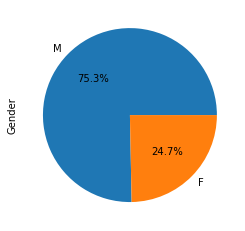

In [564]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.1f%%')

<AxesSubplot:ylabel='Frequency'>

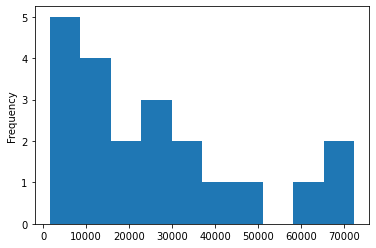

In [565]:
df['Occupation'].value_counts().plot(kind='hist')

In [566]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [567]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:ylabel='Marital_Status'>

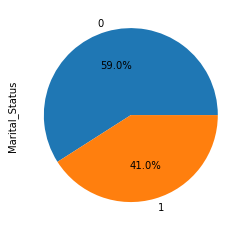

In [568]:
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%.1f%%')

<AxesSubplot:ylabel='Frequency'>

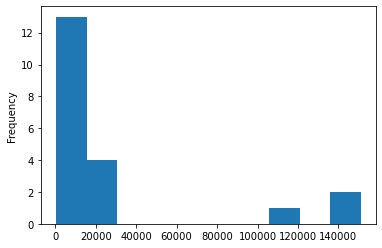

In [569]:
df['Product_Category_1'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

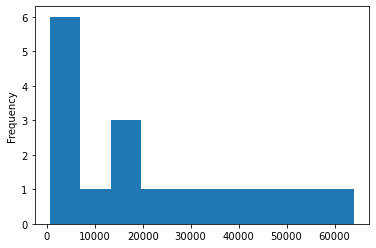

In [570]:
df['Product_Category_2'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

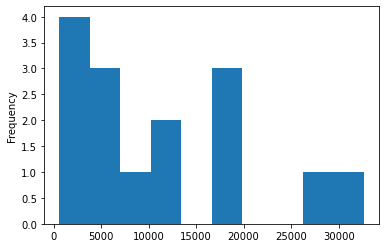

In [571]:
df['Product_Category_3'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

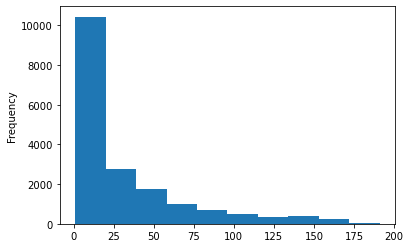

In [572]:
df['Purchase'].value_counts().plot(kind='hist')

In [573]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

Text(0.5, 1.0, 'Female data Age wise')

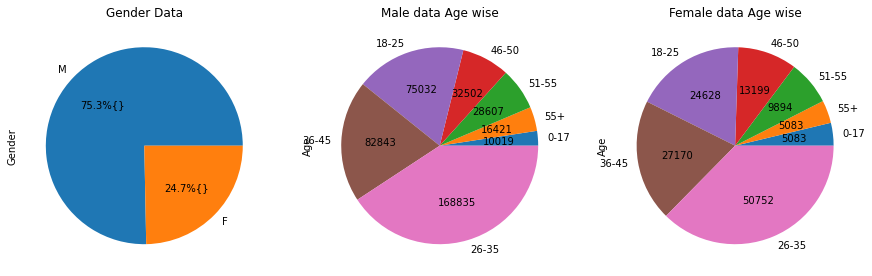

In [574]:
plt.figure(figsize=(15,5))
plt.subplot(131)
df['Gender'].value_counts().plot(kind='pie',autopct='%.1f%%{}')
plt.title('Gender Data')
plt.subplot(132)
df[df['Gender']=='M']['Age'].value_counts().sort_values().plot(kind='pie',autopct=lambda x: '{:.0f}'.format(x*(df[df['Gender']=='M']['Age'].value_counts().sort_values()).sum()/100))
plt.title('Male data Age wise')
plt.subplot(133)
df[df['Gender']=='F']['Age'].value_counts().sort_values().plot(kind='pie',autopct=lambda x: '{:.0f}'.format(x*(df[df['Gender']=='F']['Age'].value_counts().sort_values()).sum()/100))

plt.title('Female data Age wise')

Text(0.5, 1.0, 'Female data Age wise')

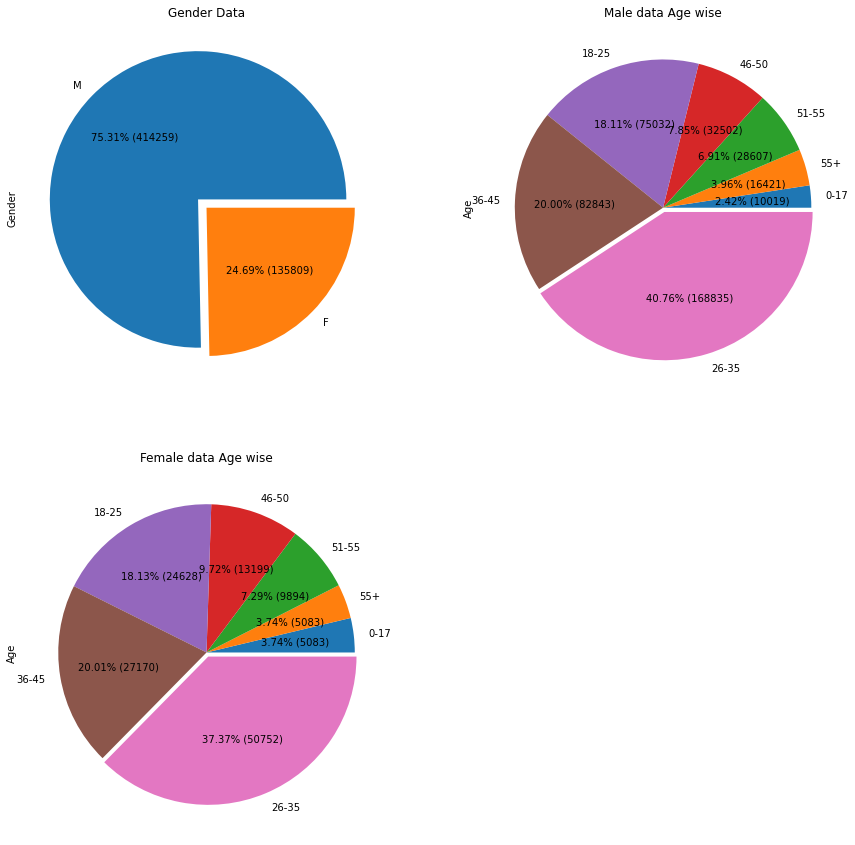

In [575]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df['Gender'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,(p/100)*(df['Gender'].value_counts()).sum()),explode=[0.08,0])
plt.title('Gender Data')

plt.subplot(222)
df[df['Gender']=='M']['Age'].value_counts().sort_values().plot(kind='pie',autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,(p/100)*(df[df['Gender']=='M']['Age'].value_counts().sort_values()).sum()),explode=[0,0,0,0,0,0,0.03])
plt.title('Male data Age wise')

plt.subplot(223)
df[df['Gender']=='F']['Age'].value_counts().sort_values().plot(kind='pie',autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,(p/100)*(df[df['Gender']=='F']['Age'].value_counts().sort_values()).sum()),explode=[0,0,0,0,0,0,0.03])
plt.title('Female data Age wise')

In [576]:
p2_mean = int(df['Product_Category_2'].mean())
p3_mean = int(df['Product_Category_3'].mean())

In [577]:
df['Product_Category_2']=df['Product_Category_2'].fillna(p2_mean).astype(int)
df['Product_Category_3']=df['Product_Category_3'].fillna(p3_mean).astype(int)

<AxesSubplot:ylabel='City_Category'>

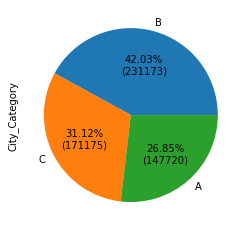

In [578]:
df['City_Category'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['City_Category'].value_counts().sum())))

<AxesSubplot:ylabel='Marital_Status'>

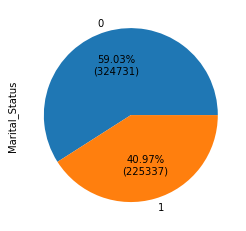

In [579]:
df['Marital_Status'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['Marital_Status'].value_counts().sum())))

In [580]:
df['Marital_Status']=df['Marital_Status'].apply(lambda x: 'Married' if x==1  else 'Single')

<AxesSubplot:ylabel='Stay_In_Current_City_Years'>

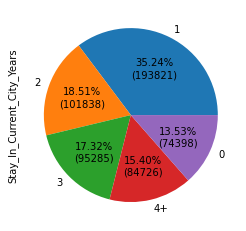

In [581]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['Stay_In_Current_City_Years'].value_counts().sum())))

In [582]:
def bar_Value(data,hue=None,x_pos=0.25,heights=height/10):
    '''
    data: data
    hue: hue data
    x_pos: int/float - to position the value
    
    '''
    ax = sns.countplot(data,hue=hue)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)
        x = i.get_x() # get x_axis value
        ax.text(x=x+x_pos,y=height-(heights),s=height,fontsize=10,fontweight='bold')


Text(0.5, 1.0, 'Female in City')

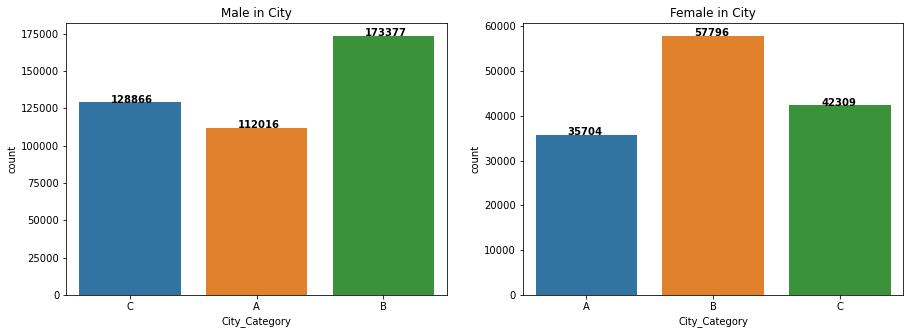

In [583]:
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_Value(df[df['Gender']=='M']['City_Category'])
plt.title('Male in City')
plt.subplot(122)
bar_Value(df[df['Gender']=='F']['City_Category'])
plt.title('Female in City')

Text(0.5, 1.0, ' Marital_Status Gender wise')

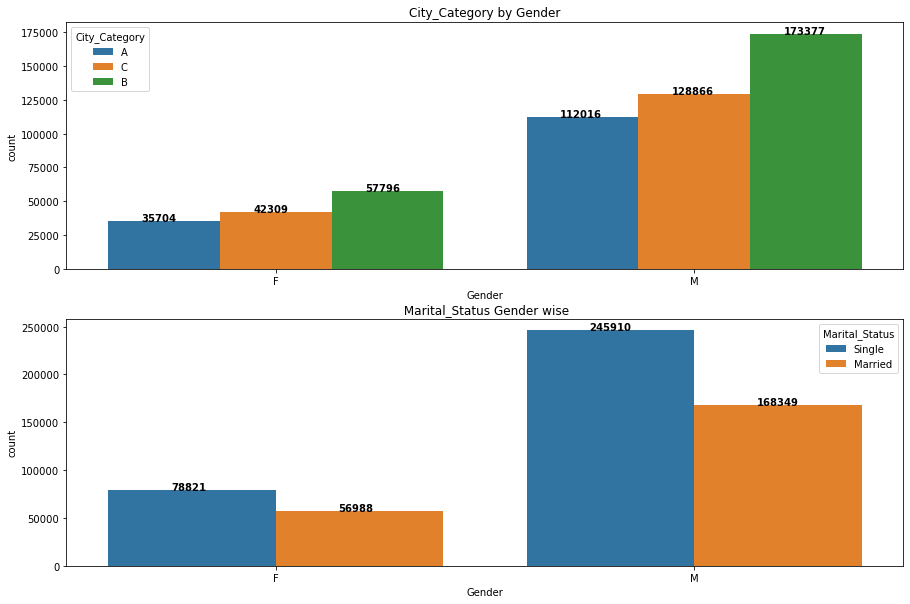

In [584]:
plt.figure(figsize=(15,10))
plt.subplot(211)
bar_Value(df['Gender'],df['City_Category'],x_pos=0.08)
plt.title('City_Category by Gender')

plt.subplot(212)
bar_Value(df['Gender'],hue=df['Marital_Status'],x_pos=0.15)
plt.title(' Marital_Status Gender wise')

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  object
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  int32 
 8   Product_Category_3          550068 non-null  int32 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(2), int64(3), object(5)
memory usage: 37.8+ MB


In [586]:
def Value_Countplot(data,hue=None,x_pos=0.25,heights=height/10,rotation=None):
    '''
    data: data
    hue: hue data
    x_pos: int/float - to position the value
    
    '''
    ax = sns.countplot(data,hue=hue)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)
        x = i.get_x() # get x_axis value
        ax.text(x=x+x_pos,y=height-(heights),s=height,fontsize=10,fontweight='bold',rotation=rotation)

Text(0.5, 1.0, 'Product_Category_3 used by Gender')

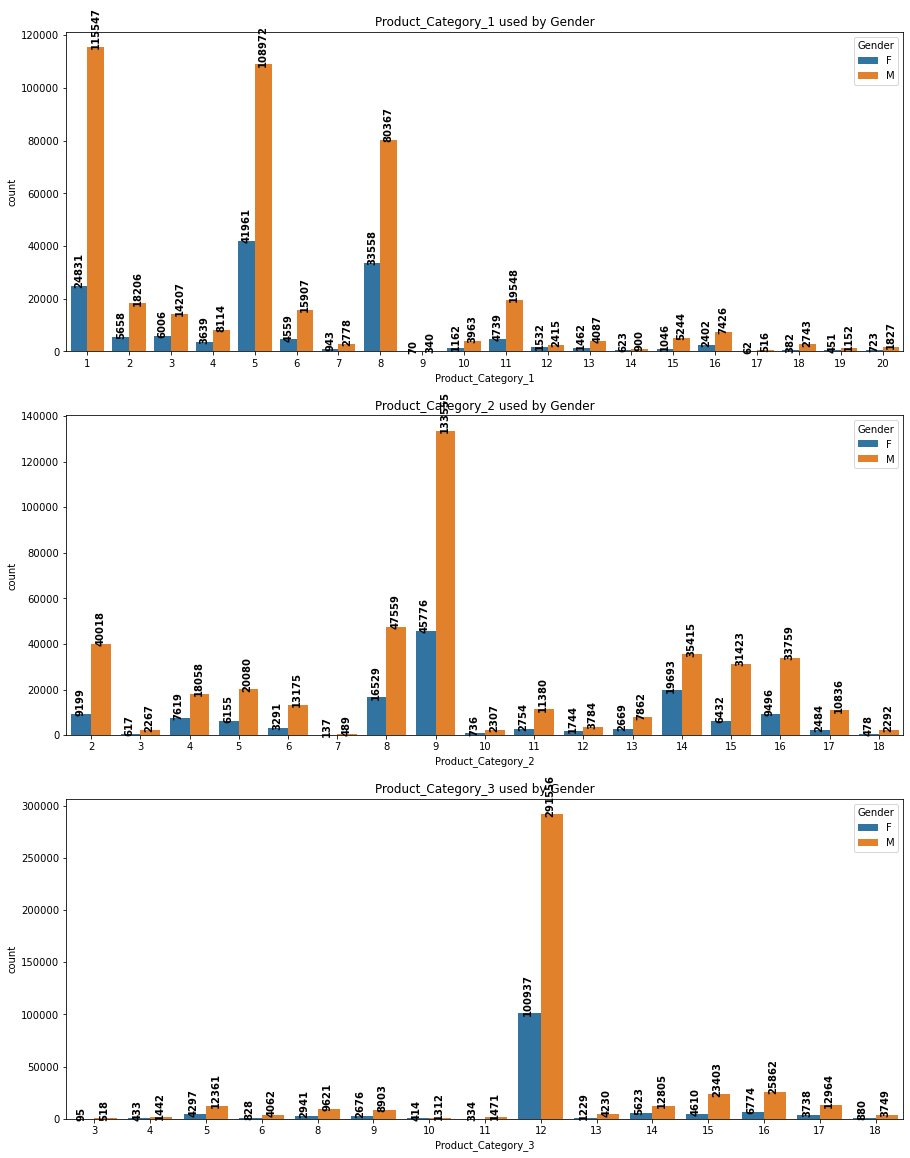

In [587]:
plt.figure(figsize=(15,20))
plt.subplot(311)
Value_Countplot(df['Product_Category_1'],hue=df['Gender'],rotation=90,x_pos=.08)
plt.title('Product_Category_1 used by Gender')

plt.subplot(312)
Value_Countplot(df['Product_Category_2'],hue=df['Gender'],rotation=90,x_pos=.08)
plt.title('Product_Category_2 used by Gender')

plt.subplot(313)
Value_Countplot(df['Product_Category_3'],hue=df['Gender'],rotation=90,x_pos=.08)
plt.title('Product_Category_3 used by Gender')

Text(0.5, 1.0, 'Product_Category_3 used by Marital_Status')

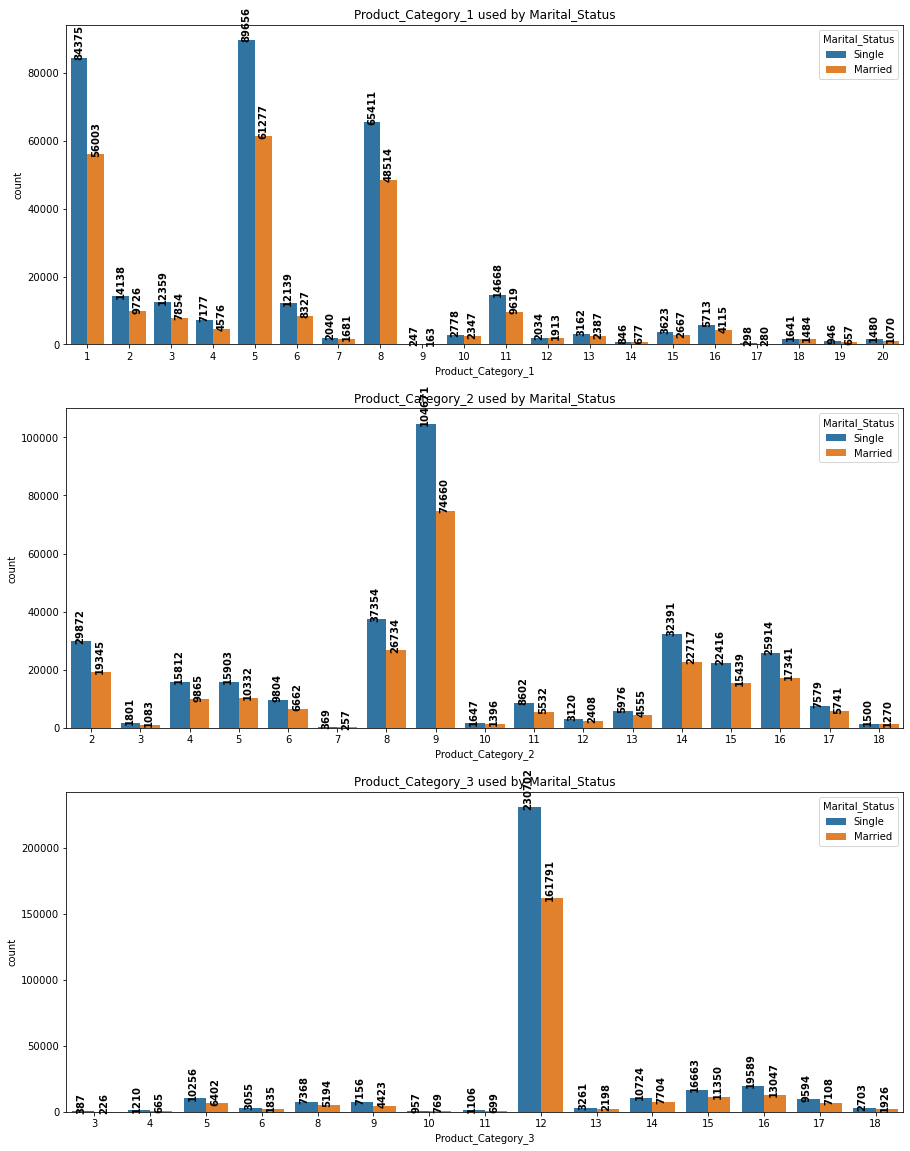

In [588]:
plt.figure(figsize=(15,20))
plt.subplot(311)
Value_Countplot(df['Product_Category_1'],hue=df['Marital_Status'],rotation=90,x_pos=.08)
plt.title('Product_Category_1 used by Marital_Status')

plt.subplot(312)
Value_Countplot(df['Product_Category_2'],hue=df['Marital_Status'],rotation=90,x_pos=.08)
plt.title('Product_Category_2 used by Marital_Status')

plt.subplot(313)
Value_Countplot(df['Product_Category_3'],hue=df['Marital_Status'],rotation=90,x_pos=.08)
plt.title('Product_Category_3 used by Marital_Status')

Text(0.5, 1.0, 'Product_Category_3 used by City_Category')

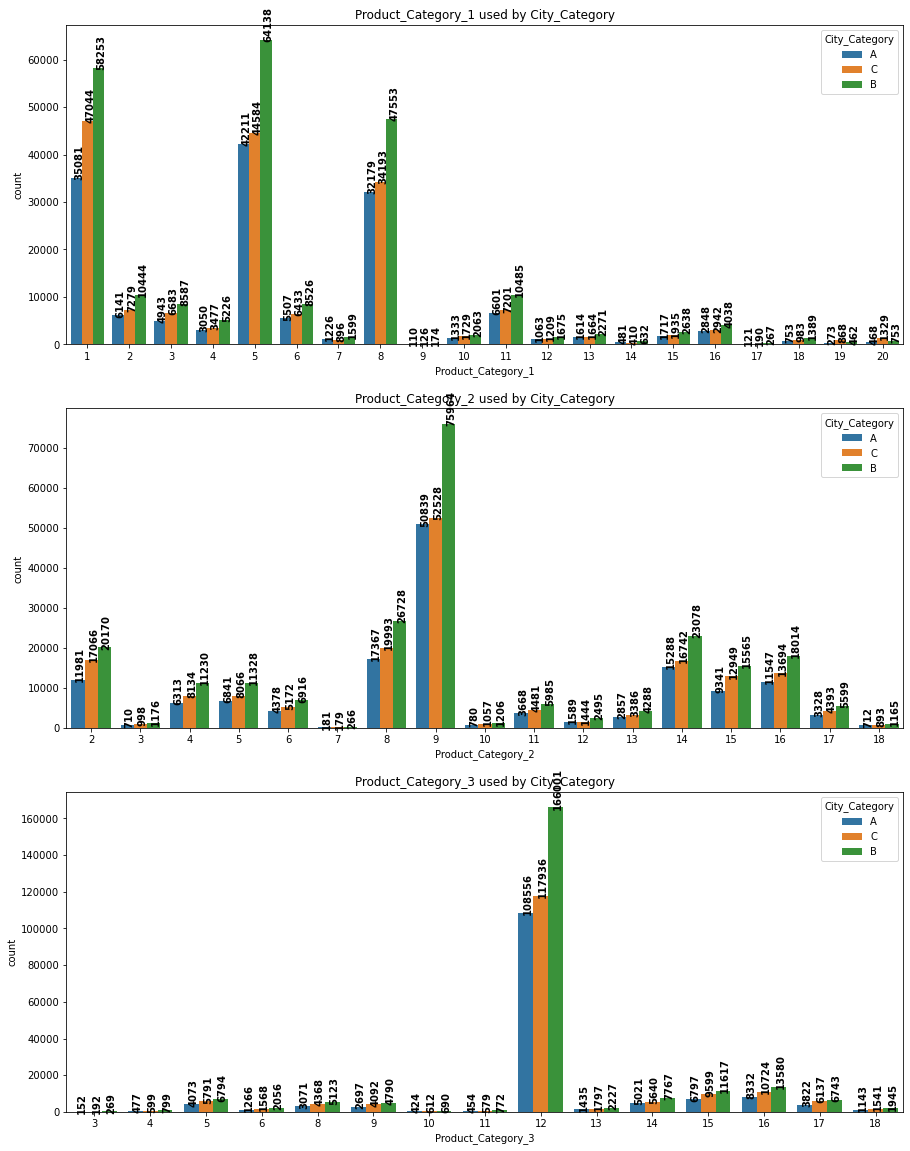

In [589]:
plt.figure(figsize=(15,20))
plt.subplot(311)
Value_Countplot(df['Product_Category_1'],hue=df['City_Category'],rotation=90,x_pos=.08)
plt.title('Product_Category_1 used by City_Category')

plt.subplot(312)
Value_Countplot(df['Product_Category_2'],hue=df['City_Category'],rotation=90,x_pos=.08)
plt.title('Product_Category_2 used by City_Category')

plt.subplot(313)
Value_Countplot(df['Product_Category_3'],hue=df['City_Category'],rotation=90,x_pos=.08)
plt.title('Product_Category_3 used by City_Category')

Text(0.5, 1.0, 'Product_Category_3 used by Stay_In_Current_City_Years')

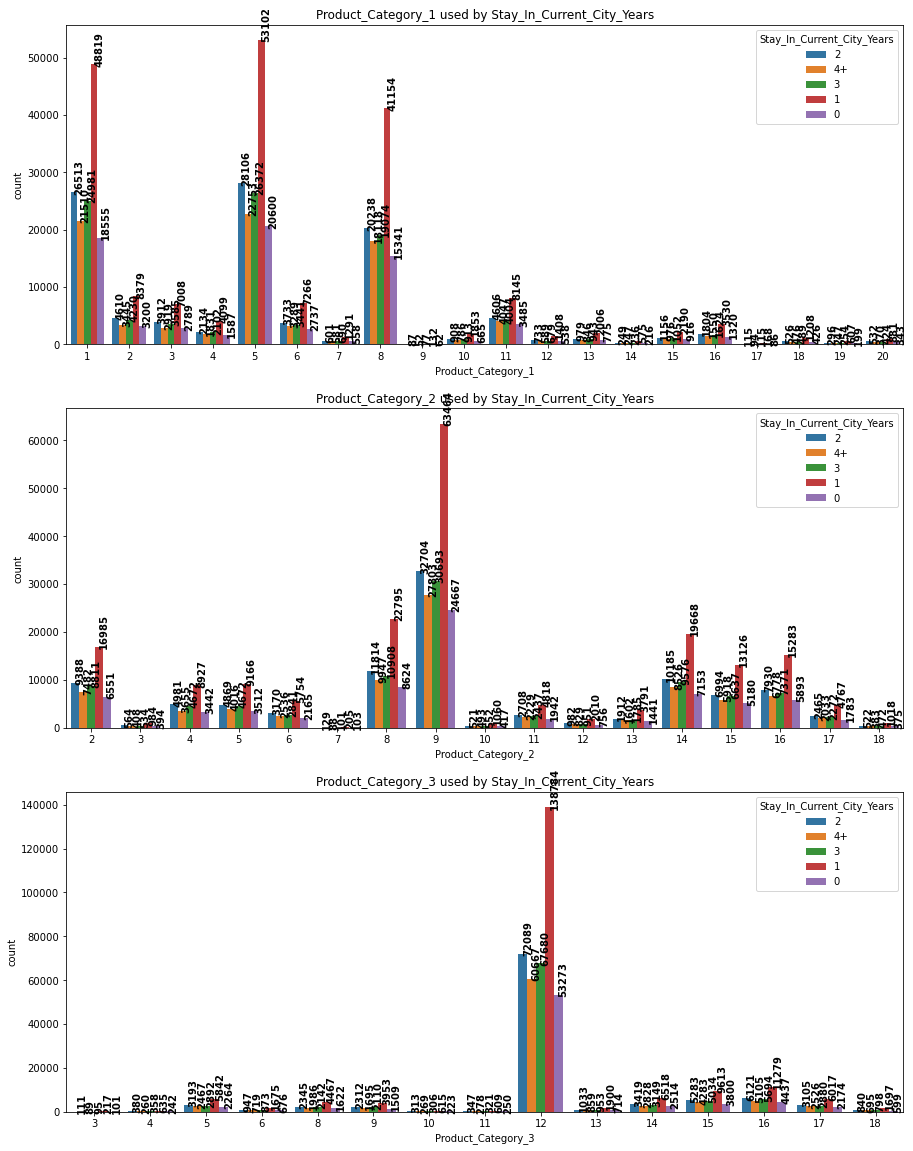

In [590]:
plt.figure(figsize=(15,20))
plt.subplot(311)
Value_Countplot(df['Product_Category_1'],hue=df['Stay_In_Current_City_Years'],rotation=90,x_pos=.08)
plt.title('Product_Category_1 used by Stay_In_Current_City_Years')

plt.subplot(312)
Value_Countplot(df['Product_Category_2'],hue=df['Stay_In_Current_City_Years'],rotation=90,x_pos=.08)
plt.title('Product_Category_2 used by Stay_In_Current_City_Years')

plt.subplot(313)
Value_Countplot(df['Product_Category_3'],hue=df['Stay_In_Current_City_Years'],rotation=90,x_pos=.08)
plt.title('Product_Category_3 used by Stay_In_Current_City_Years')

In [591]:
temp = df[df['Gender']=='M']
temp=temp[temp['Age']=='26-35']
temp[temp['City_Category']=='A']['Product_Category_1'].value_counts()

5     15770
1     14746
8     11224
11     2903
2      2274
6      2162
3      1739
16     1139
4      1051
15      677
13      582
7       508
10      475
18      317
12      244
20      142
14      125
19       92
9        47
17       37
Name: Product_Category_1, dtype: int64